#  AirBnB IronHack - Predict AirBnB price in Amsterdam

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as plt
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cm
sns.set(rc={"figure.figsize": (12.,6.)})
from src.cleaning4 import *

In [2]:
data=pd.read_csv('Data/train.csv')
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2842228,20211205213126,2021-12-06,Your little appartment on wheels,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",https://a0.muscache.com/pictures/cc2aa51a-3c11...,3040748,https://www.airbnb.com/users/show/3040748,Henk,2012-07-24,"Amsterdam, North Holland, The Netherlands","Living in the countryside, just near Amsterdam...",within a few hours,100%,75%,f,https://a0.muscache.com/im/users/3040748/profi...,https://a0.muscache.com/im/users/3040748/profi...,NaN,13,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Noord-Oost,NaN,52.39508,4.99186,Private room in farm stay,Private room,3,NaN,1.5 shared baths,1.0,NaN,"[""First aid kit"", ""Free parking on premises"", ...",87.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,249,2021-12-06,81,0,0,2014-08-03,2019-06-15,4.62,4.56,4.29,4.57,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,https://www.airbnb.com/rooms/41236669,20211205213126,2021-12-06,Spacious 4p city center apartment (2 bedrooms!),Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,https://a0.muscache.com/pictures/5f33bf5a-399c...,34773624,https://www.airbnb.com/users/show/34773624,Julie,2015-06-01,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/a5da3...,https://a0.muscache.com/im/pictures/user/a5da3...,Weesperbuurt en Plantage,0,0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,NaN,52.36371,4.90745,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Hot water kettle"", ""Pocket wifi"", ""Stove"", ""...",250.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,3,3,3,3,2021-12-06,9,4,1,2020-01-26,2021-09-05,5.00,5.00,5.00,4.89,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40


*Firstly we drop those columns that, without any analysis, we know we wont wont use them to predict the price*

In [3]:
data=data.drop(columns=['listing_url','scrape_id','last_scraped','name','picture_url','host_url','host_name',
                        'host_thumbnail_url',
                        'host_picture_url','license','host_about','description','host_location','host_neighbourhood',
                       'neighbourhood_group_cleansed','bathrooms','calendar_updated','calendar_last_scraped',
                       'host_verifications','host_id','host_since','host_response_time','host_response_rate',
                       'host_acceptance_rate','first_review','last_review'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4167 non-null   int64  
 1   neighborhood_overview                         3004 non-null   object 
 2   host_is_superhost                             4167 non-null   object 
 3   host_listings_count                           4167 non-null   int64  
 4   host_total_listings_count                     4167 non-null   int64  
 5   host_has_profile_pic                          4167 non-null   object 
 6   host_identity_verified                        4167 non-null   object 
 7   neighbourhood                                 3004 non-null   object 
 8   neighbourhood_cleansed                        4167 non-null   object 
 9   latitude                                      4167 non-null   f

In [5]:
data.shape

(4167, 48)

*We need to check the proportion of nan values*

In [6]:
pd.options.display.min_rows = 74
nan=((data.isnull().sum())/len(data))*100
nan.sort_values(ascending = False)[:25]

neighborhood_overview                           27.909767
neighbourhood                                   27.909767
review_scores_value                              9.239261
review_scores_location                           9.239261
review_scores_communication                      9.239261
review_scores_checkin                            9.239261
review_scores_cleanliness                        9.239261
review_scores_accuracy                           9.239261
reviews_per_month                                9.047276
review_scores_rating                             9.047276
bedrooms                                         6.071514
beds                                             4.175666
bathrooms_text                                   0.191985
maximum_nights_avg_ntm                           0.023998
minimum_nights_avg_ntm                           0.023998
minimum_minimum_nights                           0.023998
minimum_maximum_nights                           0.023998
maximum_minimu

*We drop more columns due they contains the same information than others with less nan values.*

In [7]:
data=data.drop(columns=['neighbourhood','neighborhood_overview'])

In [8]:
data.shape

(4167, 46)

*Now, before droping more columns we analyzed the correlation between them in different groups. We change to numeric those we need to compare.*

In [9]:
data[['host_total_listings_count', 'maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','number_of_reviews','review_scores_accuracy',
    'review_scores_communication','review_scores_value']] = data[['host_total_listings_count', 
    'maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','number_of_reviews','review_scores_accuracy',
    'review_scores_communication','review_scores_value']].apply(pd.to_numeric,errors='coerce',axis=1)

#### Host_listings_count

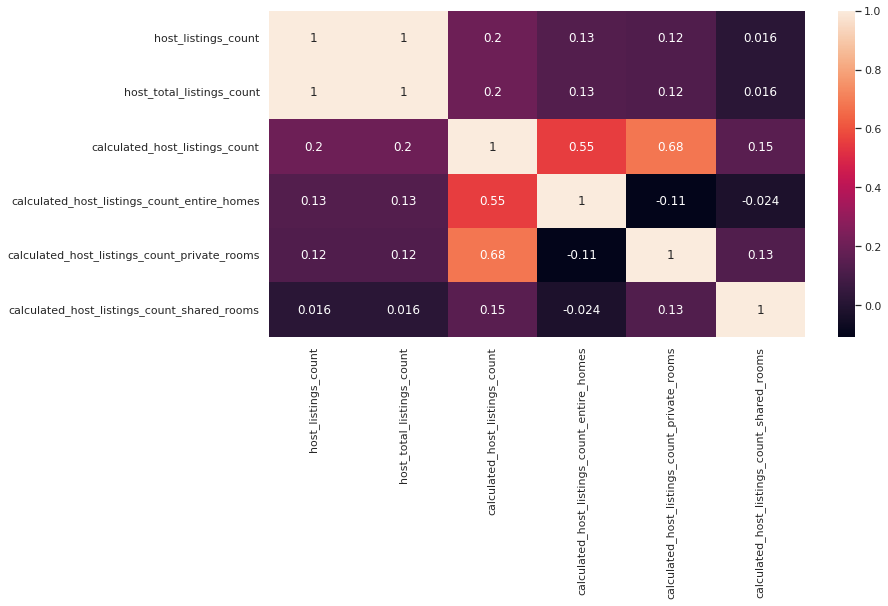

In [10]:
corrMatrix=data[['host_listings_count','host_total_listings_count', 'calculated_host_listings_count',
                 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                 'calculated_host_listings_count_shared_rooms']].corr()
sns.heatmap(corrMatrix, annot=True);

In [11]:
compare= data[["host_total_listings_count", "calculated_host_listings_count",'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']]
compare.sample(5)

,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
1271,1.0,1,0,1,0
3426,1.0,1,1,0,0
1696,1.0,1,1,0,0
16,1.0,1,1,0,0
3398,9.0,9,9,0,0


In [12]:
difference=print(sum((data.host_listings_count == data.calculated_host_listings_count) == False))
difference

1524


*After analysing this corrMatrix, we drop all the columns except 'calculated_host_listings_count' due its the sum of the other three calculated columns (regarding host_listings) and also because it reflects the same information as host_total_listings_count in about 65% of the rows. 
The only difference is that it is data obtained from scraping, while the other source is Airbnb.*

In [13]:
data1=data.drop(columns=['host_total_listings_count','calculated_host_listings_count_entire_homes',
                        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                         'host_listings_count'])

#### Minimum & Maximum nights

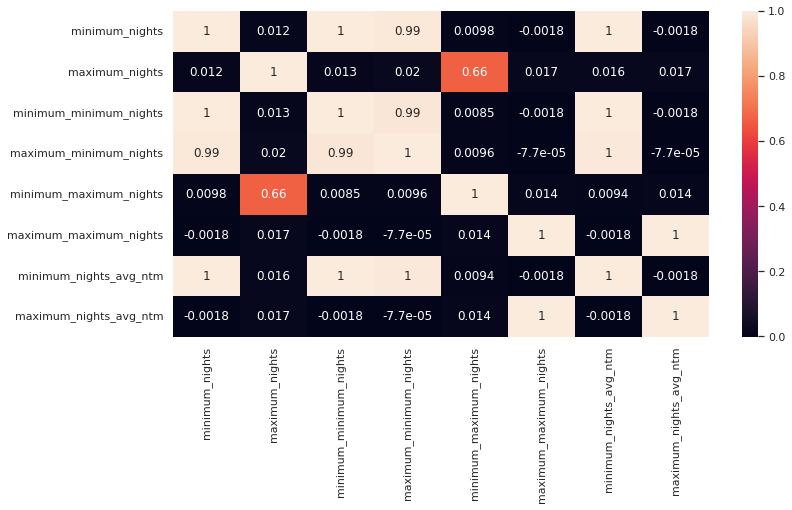

In [14]:
corrMatrix=data1[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                 'maximum_nights_avg_ntm']].corr();
sns.heatmap(corrMatrix, annot=True);

In [15]:
sum((data1.minimum_nights == data1.minimum_minimum_nights) == False)

315

*After analysing this corrMatrix, we drop all the columns except 'minimum_nights' & 'maximum_nights' due to their correlation with the others*.

In [16]:
data2=data1.drop(columns=['minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                 'maximum_nights_avg_ntm'])

#### Availability

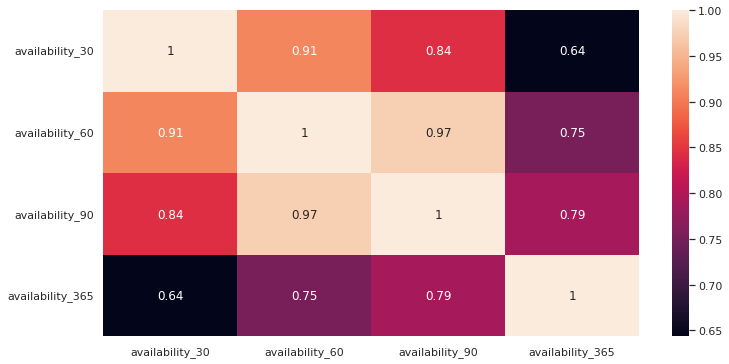

In [17]:
corrMatrix = data2[['availability_30', 'availability_60', 'availability_90','availability_365']].corr()
sns.heatmap(corrMatrix, annot=True);

In [18]:
sum((data2.availability_90 == data2.availability_60) == False)

1968

*After analysing this corrMatrix, we drop all the columns except 'availability_90' due its the one with the highest correlation with the others*.

In [19]:
data3=data2.drop(columns=['availability_30', 'availability_60','availability_365'])

#### Reviews

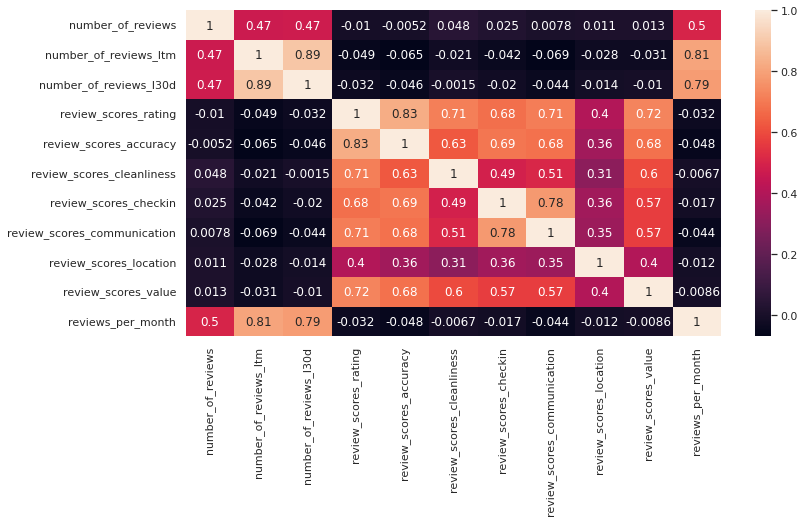

In [20]:
corrMatrix=data3[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating',
                 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                 'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']].corr();
sns.heatmap(corrMatrix, annot=True);

*We below columns, due high correlation with the others*

In [21]:
datas=data3.drop(columns=['number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_accuracy'])

In [22]:
datas.shape

(4167, 29)

*We check again nan values and total correlation*

In [23]:
pd.options.display.min_rows = 82
nan1=(datas.isnull().sum()/len(datas))*100
nan1.sort_values(ascending = False)[:10]

review_scores_value            9.239261
review_scores_location         9.239261
review_scores_communication    9.239261
review_scores_checkin          9.239261
review_scores_cleanliness      9.239261
reviews_per_month              9.047276
review_scores_rating           9.047276
bedrooms                       6.071514
beds                           4.175666
bathrooms_text                 0.191985
dtype: float64

In [24]:
corr_total=datas.corr().T
corr_total.sum()

id                                1.031742
latitude                          1.205817
longitude                         1.194249
accommodates                      2.573287
bedrooms                          2.355448
beds                              2.680746
price                             1.993043
minimum_nights                    1.002201
maximum_nights                    0.949114
availability_90                   0.875131
number_of_reviews                 1.284174
review_scores_rating              3.785869
review_scores_cleanliness         3.279348
review_scores_checkin             3.585469
review_scores_communication       3.517297
review_scores_location            2.623359
review_scores_value               3.430728
calculated_host_listings_count    0.362507
reviews_per_month                 1.235875
dtype: float64

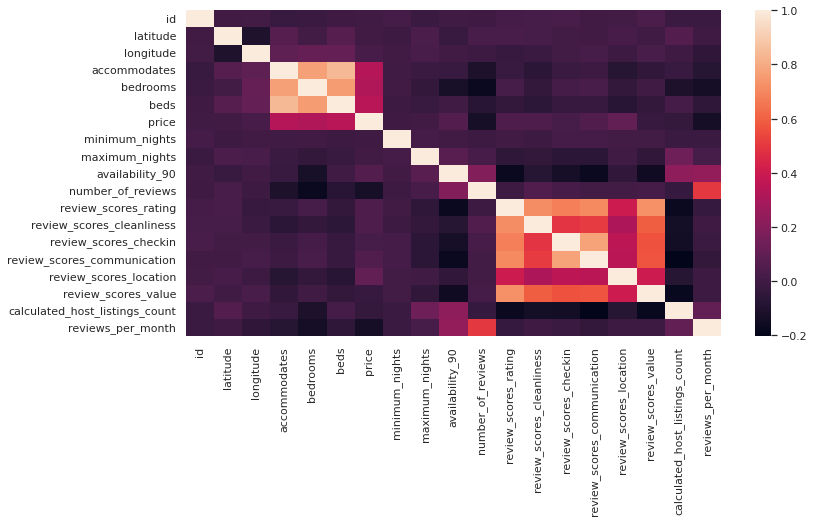

In [25]:
corrMatrix = datas.corr()
sns.heatmap(corrMatrix)
sns.set(rc={"figure.figsize": (15.,10.)})
sns.set_context("poster")
sns.set_style("whitegrid")
plt.show();

*Regarding latitude and longitude we drop them and create a different dataframe to use later. We also drop beds due correlation with accomodates*

In [26]:
location=datas[['id','latitude','longitude']]

In [27]:
dt=datas.drop(columns=['latitude','longitude','beds'])

In [28]:
dt.isnull().sum()

id                                  0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_text                      8
bedrooms                          253
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_90                     0
number_of_reviews                   0
review_scores_rating              377
review_scores_cleanliness         385
review_scores_checkin             385
review_scores_communication       385
review_scores_location            385
review_scores_value               385
instant_bookable                    0
calculated_host_listings_count      0
reviews_per_month                 377
dtype: int64

*Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including*

In [29]:
dt.replace({'f': 0, 't': 1}, inplace=True)

*We also need to change to numeric several columns to plot the histograms.*

In [30]:
dt[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']] = dt[['host_is_superhost',
    'host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']].apply(pd.to_numeric,errors='coerce',axis=1)

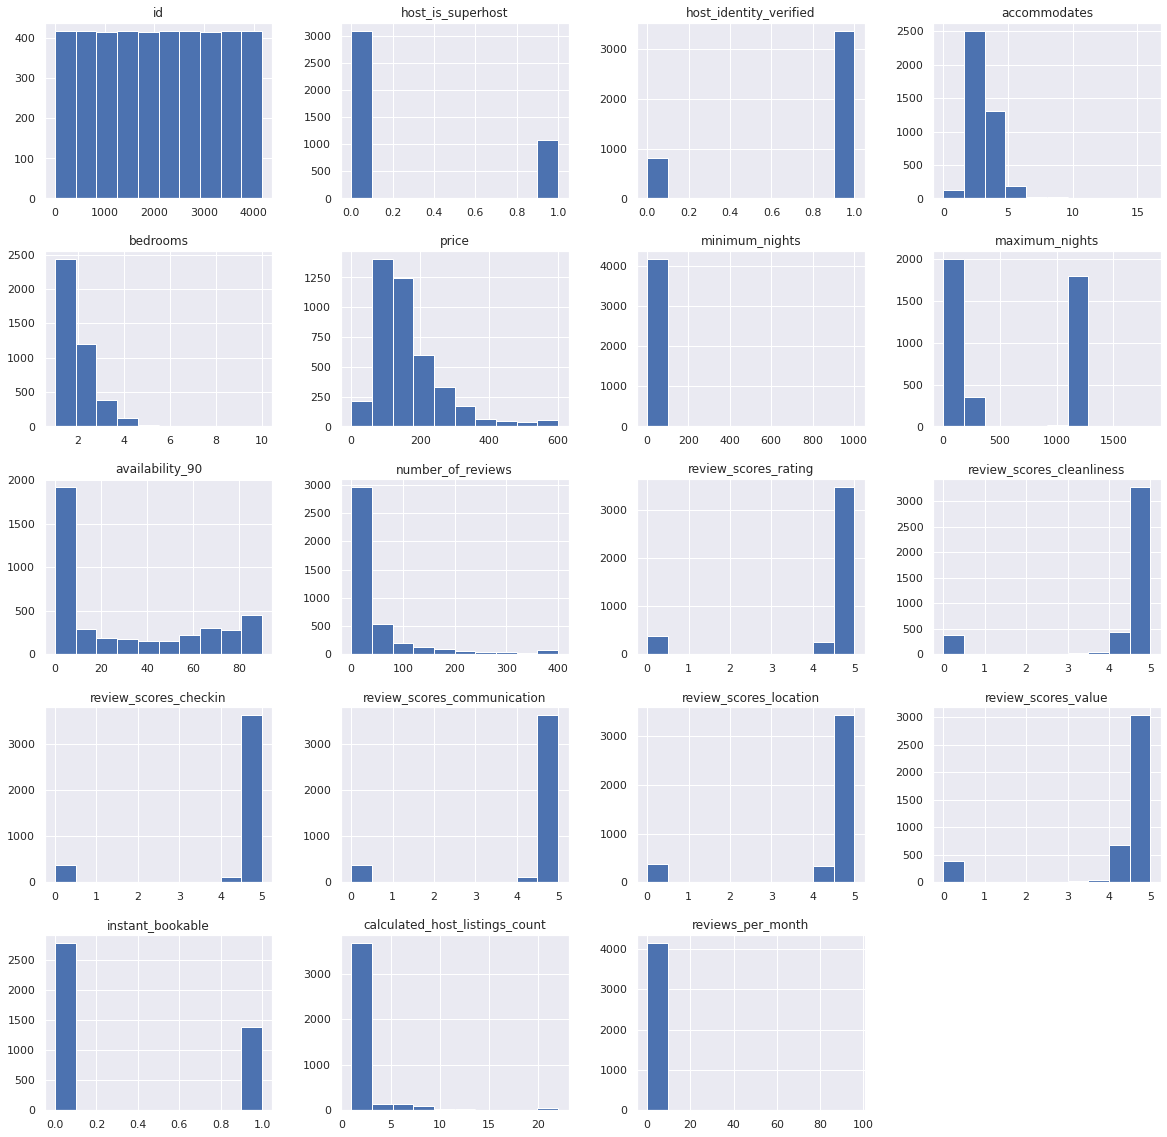

In [106]:
dt.hist(figsize=(20,20));
sns.set(rc={"figure.figsize": (20.,20.)})
plt.xticks(size = 0)
plt.yticks(size = 0);

*We can conculde that several columns only contain one category so they can be dropped.*

In [32]:
dt=dt.drop(columns=['has_availability','host_has_profile_pic'])

In [33]:
dt.shape

(4167, 24)

*We check again the sum of nan values to replace them where its convenient*

In [34]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)[:8]

review_scores_value            385
review_scores_location         385
review_scores_communication    385
review_scores_checkin          385
review_scores_cleanliness      385
reviews_per_month              377
review_scores_rating           377
bedrooms                       253
dtype: int64

*We fill with'0' the rows with nan in the reviews columns.*

In [35]:
dt[['review_scores_rating']]=dt[['review_scores_rating']].fillna(value=0)
dt[['review_scores_value']]=dt[['review_scores_value']].fillna(value=0)
dt[['review_scores_location']]=dt[['review_scores_location']].fillna(value=0)
dt[['review_scores_checkin']]=dt[['review_scores_checkin']].fillna(value=0)
dt[['review_scores_cleanliness']]=dt[['review_scores_cleanliness']].fillna(value=0)
dt[['reviews_per_month']]=dt[['reviews_per_month']].fillna(value=0)
dt[['review_scores_communication']]=dt[['review_scores_communication']].fillna(value=0)

*We will replace the nan values in the bedrooms columns with the mean.*

In [36]:
dt[['bedrooms']]=dt[['bedrooms']].fillna(value=round(dt.bedrooms.mean()))

In [37]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)

bathrooms_text                    8
id                                0
availability_90                   0
calculated_host_listings_count    0
instant_bookable                  0
review_scores_value               0
review_scores_location            0
review_scores_communication       0
review_scores_checkin             0
review_scores_cleanliness         0
review_scores_rating              0
number_of_reviews                 0
maximum_nights                    0
host_is_superhost                 0
minimum_nights                    0
price                             0
amenities                         0
bedrooms                          0
accommodates                      0
room_type                         0
property_type                     0
neighbourhood_cleansed            0
host_identity_verified            0
reviews_per_month                 0
dtype: int64

*We clean property type and bathrooms_text columns*

In [38]:
dt['property_type']=dt['property_type'].apply(room)

In [39]:
dt['bathrooms_text']=dt['bathrooms_text'].apply(limpieza2)
dt.head(2)

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,amenities,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,0,0.0,1.0,Noord-Oost,house,Private room,3,1.5,1.0,"[""First aid kit"", ""Free parking on premises"", ...",87.0,2,1125.0,0,81.0,4.62,4.29,4.57,4.75,4.69,4.49,0.0,10,0.91
1,1,0.0,0.0,Centrum-Oost,house,Entire home/apt,4,1,2.0,"[""Hot water kettle"", ""Pocket wifi"", ""Stove"", ""...",250.0,2,1125.0,3,9.0,5.00,5.00,4.89,5.00,5.00,4.89,0.0,1,0.40


In [40]:
dt.shape

(4167, 24)

*We convert several columns from float to integer*

In [41]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4167 non-null   int64  
 1   host_is_superhost               4167 non-null   float64
 2   host_identity_verified          4167 non-null   float64
 3   neighbourhood_cleansed          4167 non-null   object 
 4   property_type                   4167 non-null   object 
 5   room_type                       4167 non-null   object 
 6   accommodates                    4167 non-null   int64  
 7   bathrooms_text                  4167 non-null   object 
 8   bedrooms                        4167 non-null   float64
 9   amenities                       4167 non-null   object 
 10  price                           4167 non-null   float64
 11  minimum_nights                  4167 non-null   int64  
 12  maximum_nights                  41

In [42]:
dt= dt.astype({'host_is_superhost':'int','host_identity_verified':'int','bedrooms':'int',
              'maximum_nights':'int','number_of_reviews':'int','instant_bookable':'int'}) 

*For now, we will also drop the amenities column*

In [43]:
dt=dt.drop(columns='amenities')

In [44]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4167 non-null   int64  
 1   host_is_superhost               4167 non-null   int64  
 2   host_identity_verified          4167 non-null   int64  
 3   neighbourhood_cleansed          4167 non-null   object 
 4   property_type                   4167 non-null   object 
 5   room_type                       4167 non-null   object 
 6   accommodates                    4167 non-null   int64  
 7   bathrooms_text                  4167 non-null   object 
 8   bedrooms                        4167 non-null   int64  
 9   price                           4167 non-null   float64
 10  minimum_nights                  4167 non-null   int64  
 11  maximum_nights                  4167 non-null   int64  
 12  availability_90                 41

##### OUTLIERS

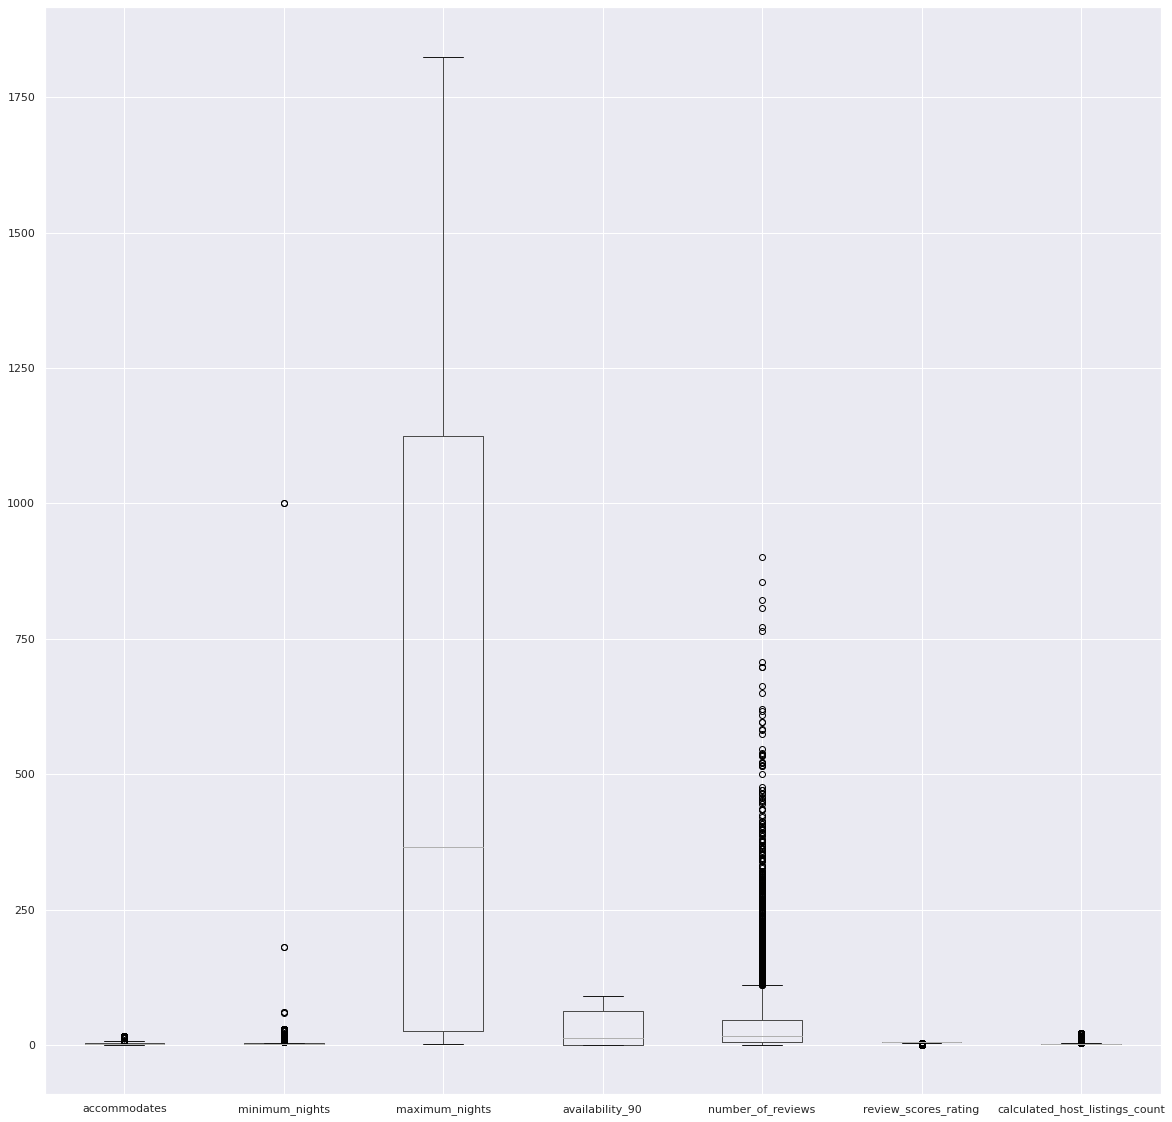

In [45]:
boxplot = dt.boxplot(column=['accommodates','minimum_nights','maximum_nights','availability_90','number_of_reviews','review_scores_rating',
                                 'calculated_host_listings_count'])

In [46]:
dt.number_of_reviews.median()

17.0

In [47]:
dt.number_of_reviews.mean()

48.94576433885289

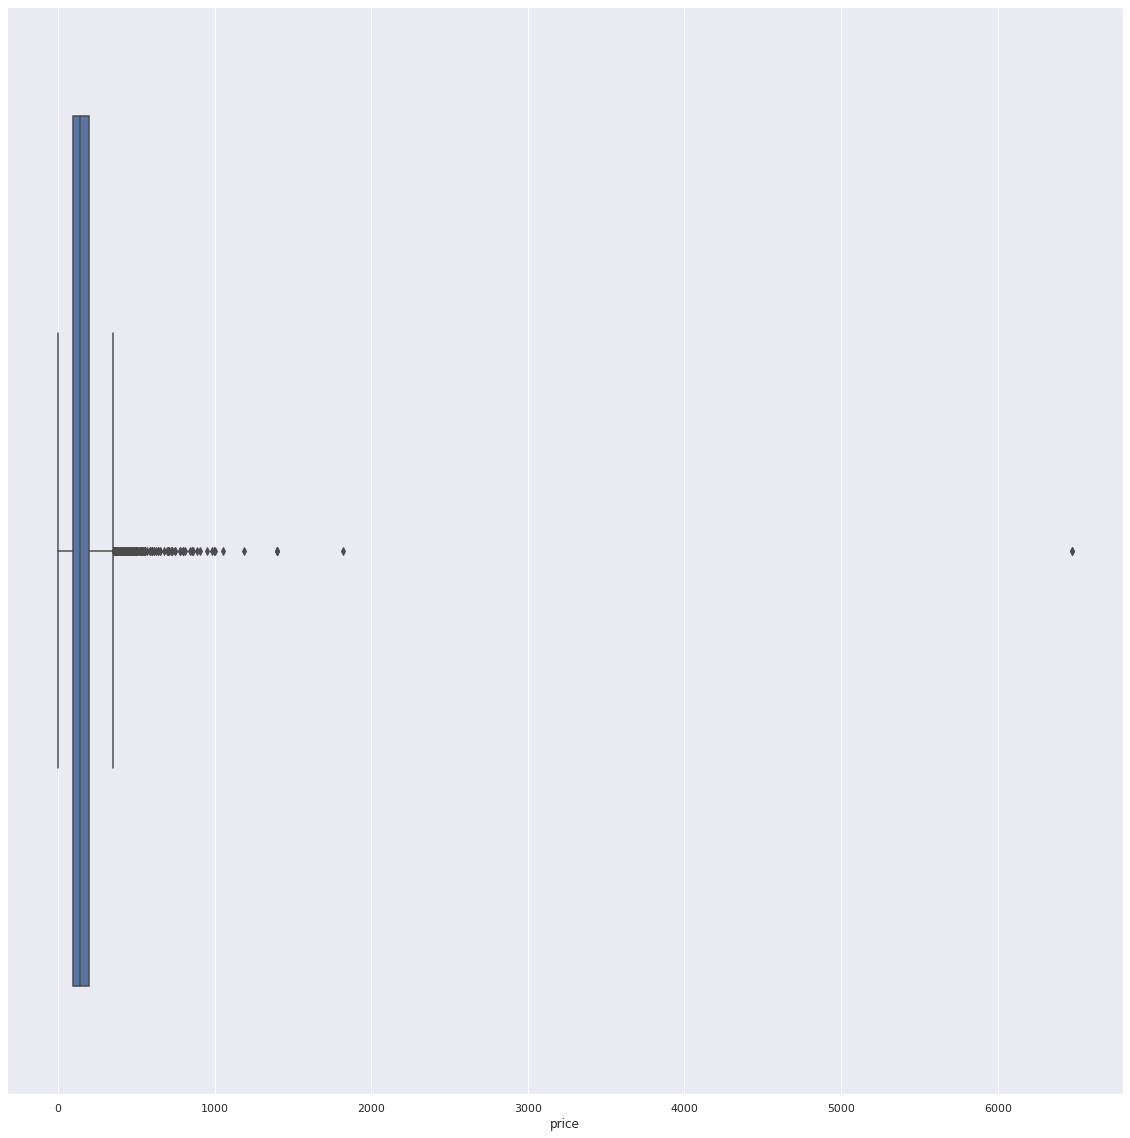

In [48]:
sns.boxplot(x=dt['price'])
sns.set(rc={"figure.figsize": (5.,5.)})

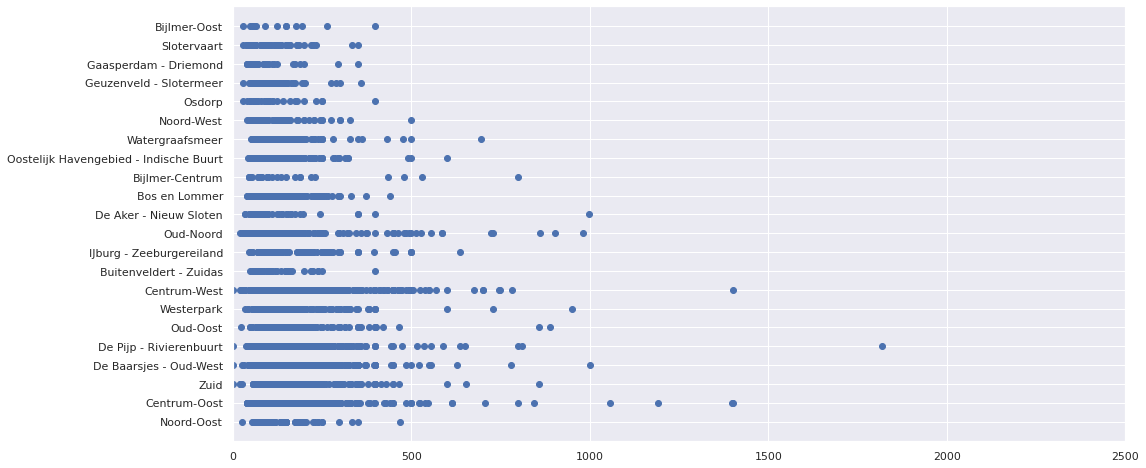

In [49]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dt['price'], dt['neighbourhood_cleansed'])
plt.xlim([0, 2500])
plt.show()

In [50]:
dt.price.mean()

168.6769858411327

In [51]:
dt.price.median()

138.0

We will 'remove' price outliers. If price > 600 we will replace it for 500€

In [52]:
dt['price']=dt['price'].apply(sales)

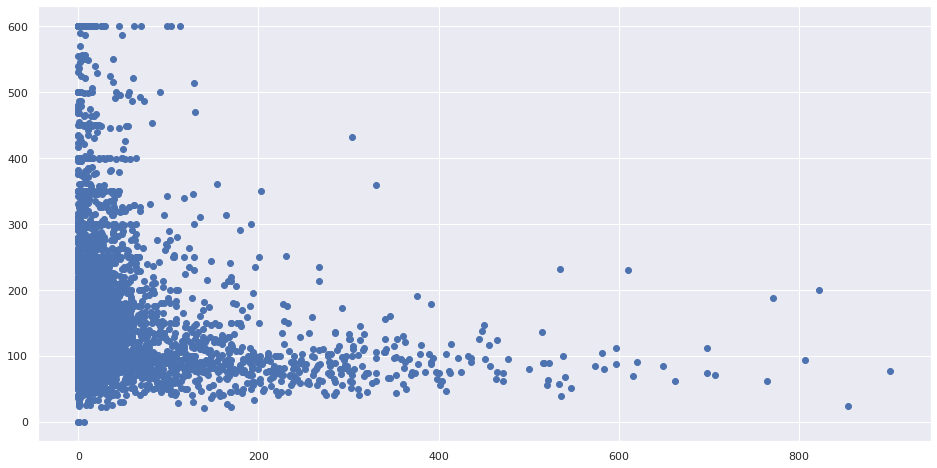

In [53]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(dt['number_of_reviews'],dt['price'])
#plt.xlim([400, 800])
plt.show()

We will 'remove' number_of_reviews outliers. If number > 400 we will replace it for 400€

In [54]:
dt['number_of_reviews']=dt['number_of_reviews'].apply(rev)

In [55]:
dt.shape

(4167, 23)

*Finally,we convert the object columns with 'get dummies'*

In [56]:
final=pd.get_dummies(data=dt,columns=['neighbourhood_cleansed','property_type','room_type','bathrooms_text'], drop_first=True)
final.head(1)

,id,host_is_superhost,host_identity_verified,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,neighbourhood_cleansed_Bijlmer-Oost,neighbourhood_cleansed_Bos en Lommer,neighbourhood_cleansed_Buitenveldert - Zuidas,neighbourhood_cleansed_Centrum-Oost,neighbourhood_cleansed_Centrum-West,neighbourhood_cleansed_De Aker - Nieuw Sloten,neighbourhood_cleansed_De Baarsjes - Oud-West,neighbourhood_cleansed_De Pijp - Rivierenbuurt,neighbourhood_cleansed_Gaasperdam - Driemond,neighbourhood_cleansed_Geuzenveld - Slotermeer,neighbourhood_cleansed_IJburg - Zeeburgereiland,neighbourhood_cleansed_Noord-Oost,neighbourhood_cleansed_Noord-West,neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,property_type_apartment,property_type_bed and breakfast,property_type_boat,property_type_condominium,property_type_hostel,property_type_hotel,property_type_house,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_0,bathrooms_text_1,bathrooms_text_1.5,bathrooms_text_2,bathrooms_text_2.5,bathrooms_text_3,bathrooms_text_3.5,bathrooms_text_4,bathrooms_text_4.5,bathrooms_text_5,bathrooms_text_5.5
0,0,0,1,3,1,87.0,2,1125,0,81,4.62,4.29,4.57,4.75,4.69,4.49,0,10,0.91,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
final.shape

(4167, 61)

## MODELING

#### Libraries

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR #recomendado paper
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.ensemble import RandomForestRegressor as RFR

### PCA

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts

In [60]:
dfnum = dt.select_dtypes(include=np.number)

In [61]:
dfnum=dfnum.drop(columns=['price'])

In [62]:
dfnum.shape

(4167, 18)

In [63]:
data=StandardScaler().fit_transform(dfnum)
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.731635,-0.593703,0.491962,0.040144,-0.674469,-0.074410,1.121117,-0.905124,0.434525,0.183460,-0.016020,0.101298,0.222253,0.248927,0.199976,-0.704436,2.535096,-0.151299
1,-1.730804,-0.593703,-2.032676,0.722918,0.443920,-0.074410,1.121117,-0.813457,-0.485782,0.451934,0.487069,0.324708,0.396455,0.469563,0.490578,-0.704436,-0.373424,-0.338950
2,-1.729973,1.684345,0.491962,-0.642630,-0.674469,-0.118947,1.121117,1.692117,-0.000064,0.303567,0.423297,0.136205,0.305870,0.377038,0.134591,1.419576,5.766784,-0.026198
3,-1.729141,-0.593703,-2.032676,-0.642630,-0.674469,-0.074410,-0.961178,-0.905124,-0.473000,0.451934,0.345354,0.401506,0.396455,0.398390,0.352542,-0.704436,-0.373424,-0.372065
4,-1.728310,1.684345,0.491962,-0.642630,-0.674469,-0.074410,-1.004916,1.478227,1.521000,0.218786,0.352439,0.366598,0.319806,0.106582,0.258097,-0.704436,-0.373424,0.168812


In [64]:
pca=PCA()
pca.fit(data)

PCA()

In [65]:
pca.explained_variance_ratio_[:10]

array([0.33676506, 0.12497455, 0.08693072, 0.06981539, 0.05679492,
       0.05522707, 0.05258698, 0.0513447 , 0.04704721, 0.04042753])

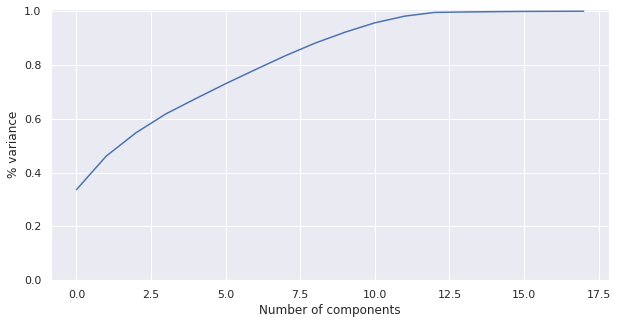

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('% variance')
plt.ylim([0, 1.01]);

### Recursive feature elimination

In [67]:
from sklearn.feature_selection import RFE

In [68]:
features=list(final.columns)
features.remove('price')

In [69]:
features=features
target='price'

In [70]:
X_train, X_test, y_train, y_test = tts(final[features], final[target])

In [71]:
modelo=RFR() 

In [72]:
selector=RFE(modelo, n_features_to_select=10, step=1)

In [73]:
selector.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

In [74]:
selector.ranking_ 

array([ 1, 22, 18,  1,  1,  2,  1,  1,  1,  5,  3,  8,  6,  1,  1, 16,  4,
        1, 45, 32, 46, 11,  9, 27, 23, 21, 42, 41, 40, 35, 39, 34, 43, 13,
       26, 37, 33, 29, 28, 19, 38, 24, 25, 36, 12, 10, 30,  1, 47, 48,  7,
       14, 17, 15, 20, 31, 50, 49, 44, 51])

In [75]:
[features[i] for i,e in enumerate(selector.support_) if e] 

['id',
 'accommodates',
 'bedrooms',
 'maximum_nights',
 'availability_90',
 'number_of_reviews',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'room_type_Private room']

In [76]:
X_train_s, X_test_s, y_train_s, y_test_s = tts(final[[features[i] for i,e in enumerate(selector.support_) if e]], 
                                       final[target])

In [77]:
rfr=RFR(n_estimators=50)

In [78]:
rfr.fit(X_train_s, y_train_s)
y_pred=rfr.predict(X_test_s)

In [79]:
train_score=rfr.score(X_train_s, y_train_s)  
test_score=rfr.score(X_test_s, y_test_s)
mean_sq=mean_squared_error(y_test_s, y_pred, squared=False)

print('Train R2:', train_score)
print('Test R2:', test_score)
print('rsme:', mean_sq)

Train R2: 0.924984685411202
Test R2: 0.4047573461622953
rsme: 76.63100515618727


In [80]:
from sklearn.feature_selection import SelectFromModel as SFM

In [81]:
modelo=CTR(verbose=0)

selector=SFM(modelo, threshold=0.25) 
selector.fit(X_train, y_train)
modelo.fit(X_train, y_train)


In [82]:
modelo.feature_importances_[:10]

array([ 3.77679782,  0.38946978,  0.61134156, 17.57523291,  7.19541927,
        3.1209613 ,  3.06579906, 10.00270832,  3.13762949,  1.93847092])

In [83]:
sum(modelo.feature_importances_)

100.0

In [84]:
list(zip(features, modelo.feature_importances_))[:10]

[('id', 3.776797824217426),
 ('host_is_superhost', 0.3894697789752602),
 ('host_identity_verified', 0.611341559757172),
 ('accommodates', 17.57523291176103),
 ('bedrooms', 7.195419267514785),
 ('minimum_nights', 3.120961300181934),
 ('maximum_nights', 3.0657990564173816),
 ('availability_90', 10.002708315224547),
 ('number_of_reviews', 3.13762948769329),
 ('review_scores_rating', 1.9384709175824393)]

### MODELS

In [85]:
X=final.drop('price', axis=1)
y=final.price

In [86]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, train_size=0.9, random_state=42)

In [87]:
def regre(modelo):
    
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_test)
    modelo.fit(X,y)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    print('rsme:', mean_sq)
   
    return modelo

In [88]:
sgdr=SGDR(max_iter=200)
sgdr=regre(sgdr)

SGDRegressor(max_iter=200)
Train R2: -1.8413348796370073e+26
Test R2: -1.4036621125668207e+26
rsme: 2838607281283482.5


In [89]:
knnr=KNNR(n_neighbors=5, weights='distance')
knnr=regre(knnr)

KNeighborsRegressor(weights='distance')
Train R2: 1.0
Test R2: 1.0
rsme: 112.51383755023798


In [90]:
gbr=GBR(n_estimators=50, learning_rate=0.2)
gbr=regre(gbr)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=50)
Train R2: 0.6371742305480232
Test R2: 0.5983306442307104
rsme: 77.03294511085706


In [91]:
xgbr=XGBR()
xgbr=regre(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Train R2: 0.9471017126439902
Test R2: 0.9496237941173039
rsme: 81.41264528200772


In [92]:
ctr=CTR(verbose=0) 
ctr=regre(ctr)

Train R2: 0.8429407419793624
Test R2: 0.8437252948932275
rsme: 74.05897831587228


In [93]:
lgbmr=LGBMR()
lgbmr=regre(lgbmr)

LGBMRegressor()
Train R2: 0.8173393034268128
Test R2: 0.8220988416063981
rsme: 74.76302639834495


In [94]:
rfr=RFR(n_estimators=200)
rfr=regre(rfr)

RandomForestRegressor(n_estimators=200)
Train R2: 0.9348909191902809
Test R2: 0.9319730897454743
rsme: 80.05284437636058


In [95]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.01, train_size=0.99, random_state=42)

In [96]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('rsme:', mean_sq)
    print('\n')
    

In [97]:
modelos=[LinReg(), Lasso(), ElasticNet(), SVR(),Ridge(),SGDR(max_iter=500),KNNR(n_neighbors=5, weights='distance'),
        GBR(n_estimators=50, learning_rate=0.2),XGBR(),CTR(verbose=0),RFR(n_estimators=100),LGBMR()]

for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train: 0.5226691786652649
Test: 0.561915081358041
rsme: 70.51924149747911


Lasso()
Train: 0.4714439344799104
Test: 0.6069351220665067
rsme: 66.79756032288914


ElasticNet()
Train: 0.4119016064469643
Test: 0.5663179538887766
rsme: 70.16397784503144


SVR()
Train: -0.06218022607808282
Test: -0.09919237069062103
rsme: 111.70312775503221


Ridge()
Train: 0.5219256692295746
Test: 0.6768619415067534
rsme: 60.56511368431335


SGDRegressor(max_iter=500)
Train: -3.5780750990403057e+25
Test: -2.4557718506393287e+25
rsme: 527986100404626.9


KNeighborsRegressor(weights='distance')
Train: 1.0
Test: -0.01840935321590287
rsme: 107.52010275472206


GradientBoostingRegressor(learning_rate=0.2, n_estimators=50)
Train: 0.6307248766671216
Test: 0.6354689567013813
rsme: 64.32736179260924


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=Non

In [98]:
def bosque(n):
    rfr=RFR(n_estimators=n,max_depth=100)
    rfr.fit(X_train, y_train)

    y_pred=rfr.predict(X_test)
    

    train_score=rfr.score(X_train, y_train)  
    test_score=rfr.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)


    print('Train:', train_score)
    print('Test:', test_score)
    print('rsme:', mean_sq)

In [99]:
for e in [2, 5, 50, 100, 200]:
    print(e, bosque(e))

Train: 0.77673045984057
Test: 0.2213000388479609
rsme: 94.018551867374
2 None
Train: 0.8713583533670587
Test: 0.50834289101042
rsme: 74.70671545004059
5 None
Train: 0.9297692474129249
Test: 0.5566949056135377
rsme: 70.93814737065631
50 None
Train: 0.9325626836425396
Test: 0.6168995554732553
rsme: 65.9454458877437
100 None
Train: 0.9338398546692397
Test: 0.5982450263897959
rsme: 67.53192229287886
200 None


## RESULTS

In [110]:
X=final.drop('price', axis=1)
y=final.price

In [111]:
Test4=pd.read_csv('Data/Test4.csv')

In [112]:
Prices=pd.read_csv('Data/sample.csv')

### 1- 85.45348

In [113]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [114]:
modelo=ctr
modelo.fit(X_train, y_train)

y_pred=modelo.predict(X_test)

train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
print(modelo)
print('Train:', train_score)
print('Test:', test_score) 
print('rsme:', mean_sq)
print('\n')

Train: 0.8671601344986046
Test: 0.5510488809482916
rsme: 67.18632993652979




### A- 87.84948

In [115]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, train_size=0.9, random_state=42)

In [116]:
    modelo=CTR(verbose=0)
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_test)
    modelo.fit(X,y)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    print('rsme:', mean_sq)

Train R2: 0.8429407419793624
Test R2: 0.8437252948932275
rsme: 74.05897831587228


In [117]:
pd.read_csv('Results/sampleA.csv').head(5)

,price,id
0,86.505874,0
1,50.676625,1
2,111.570363,2
3,95.643863,3
4,133.403877,4


### B- 89.72219

In [118]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.01, train_size=0.09, random_state=42)

In [119]:
    modelo=XGBR()
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_test)
    modelo.fit(X,y)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    print('rsme:', mean_sq)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Train R2: 0.9486818729079908
Test R2: 0.9584090395656528
rsme: 82.58842487544081


In [120]:
pd.read_csv('Results/sampleB.csv').head(5)

,price,id
0,51.739414,0
1,63.191994,1
2,123.518920,2
3,127.282340,3
4,107.309990,4


### C- 92.21771

In [121]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [122]:
    modelo=RFR(n_estimators=150)
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_test)
    modelo.fit(X,y)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    print('rsme:', mean_sq)

RandomForestRegressor(n_estimators=150)
Train R2: 0.9358538319888332
Test R2: 0.9291149722504604
rsme: 71.9002524025488


In [123]:
pd.read_csv('Results/sampleC.csv').head(5)

,price,id
0,163.953333,0
1,110.626667,1
2,105.480000,2
3,100.020000,3
4,152.813333,4
